# 01. Preparing Notebook
# 02. Data exploration visually and Stating hypothesis just below the graph
# 02a. Data exploration of each 'Bundesland'
# 02b. Data exploration for 'West' and 'East'
# 02c. Data exploration for 'City'-States and non-'City'-states
# 03. Preparing data for regression analysis
# 04. Regression Analysis 
# 05. My Thougths

## 01. Preparing Notebook

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# creating path
path = r'C:\Users\lifti\OneDrive\CareerFoundry\Data Immersion\Achievement6\German Housing Data'

In [4]:
# importing data set
df = pd.read_csv (os.path.join (path,'02 Data','Prepared Data','housing_new_without_umlauts.csv'), index_col = 0)

In [5]:
df

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_efficiency_class,State,City,Place,Garages,Garagetype;,furnish_dummy,condition_dummy,energy_dummy,Price category
0,498000.0,Multiple dwelling,106.00,229.0,80.0,01.10.2020,5.5,3.0,1.0,2.0,...,D,Baden-Wuerttemberg,Bodenseekreis,Bermatingen,2.0,Parking lot;,2.0,5.0,5.0,Middle price
1,495000.0,Mid-terrace house,140.93,517.0,20.0,01.01.2021,6.0,3.0,2.0,2.0,...,NaN,Baden-Wuerttemberg,Konstanz (Kreis),Engen,7.0,Parking lot;,1.0,5.0,4.0,Middle price
3,259000.0,Farmhouse,140.00,814.0,80.0,nach Vereinbarung,4.0,4.0,2.0,2.0,...,G,Baden-Wuerttemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage;,1.0,2.0,2.0,Middle price
4,469000.0,Multiple dwelling,115.00,244.0,80.0,sofort,4.5,2.0,1.0,2.0,...,F,Baden-Wuerttemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage;,3.0,4.0,3.0,Middle price
5,1400000.0,Mid-terrace house,310.00,860.0,100.0,sofort,8.0,4.0,2.0,3.0,...,NaN,Baden-Wuerttemberg,Stuttgart,Sued,2.0,Garage;,1.0,3.0,4.0,High price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10534,35500.0,Special property,47.00,1400.0,80.0,sofort,2.0,1.0,1.0,1.0,...,NaN,Thueringen,Saale-Orla-Kreis,Pößneck,1.0,Garage;,3.0,3.0,4.0,Low price
10535,38000.0,Farmhouse,110.00,471.0,110.0,sofort,5.0,2.0,1.0,3.0,...,NaN,Thueringen,Unstrut-Hainich-Kreis,Bad Tennstedt,2.0,Outside parking lot;,3.0,4.0,4.0,Low price
10536,348000.0,NaN,200.00,1610.0,650.0,sofort,7.0,5.0,2.0,2.0,...,NaN,Thueringen,Eichsfeld (Kreis),Bernterode (bei Heilbad Heiligenstadt),6.0,Duplex lot;,2.0,6.0,4.0,Middle price
10537,472500.0,Duplex,485.00,320.0,135.0,sofort,15.0,11.0,4.0,3.0,...,NaN,Thueringen,Unstrut-Hainich-Kreis,Muehlhausen/Thueringen,4.0,Outside parking lot;,2.0,2.0,4.0,Middle price


## 02. Data exploration visually

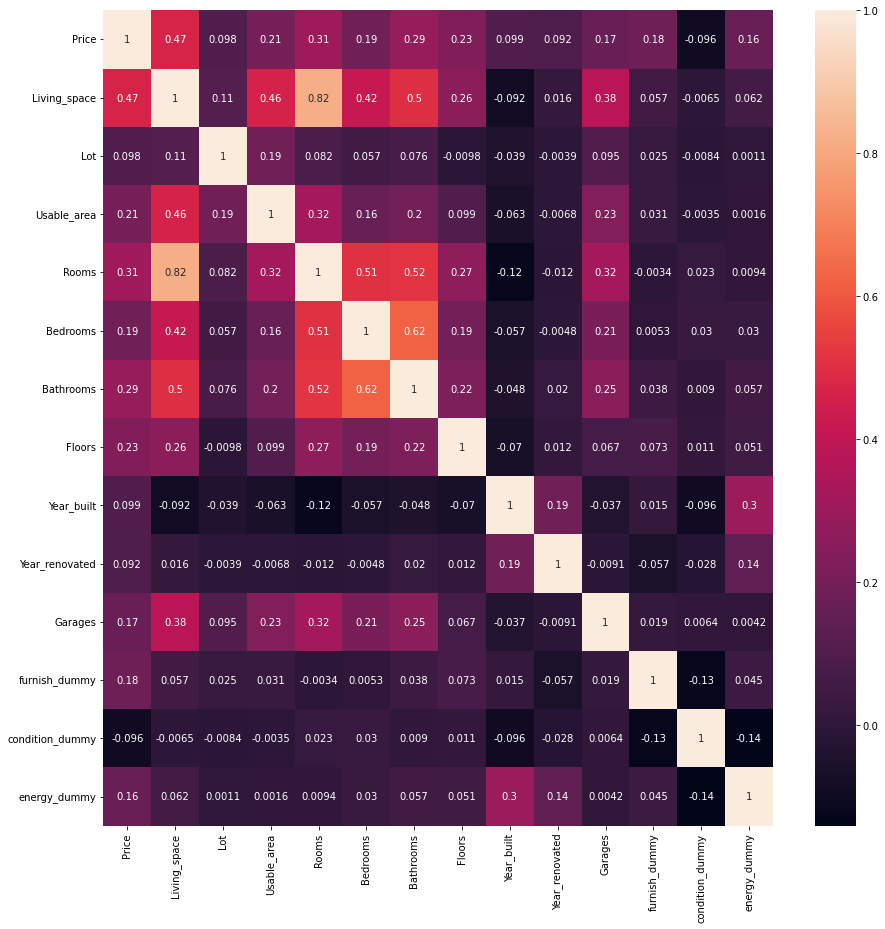

In [160]:
# creating correlation matrix
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df.corr(), annot = True, ax = ax)

In [161]:
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','corr_germany.jpg'))

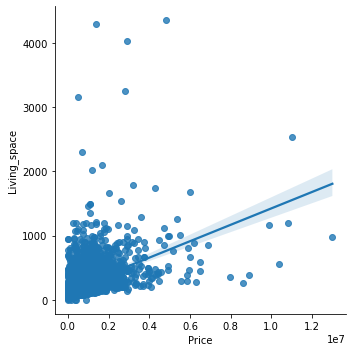

In [12]:
sns.lmplot(x = 'Price', y = 'Living_space', data = df)

#### The more living space the higher the price

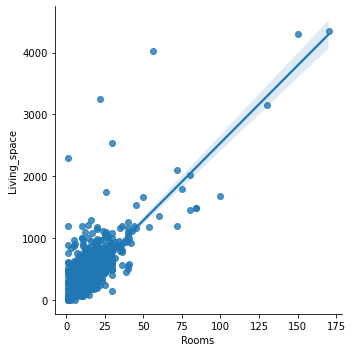

In [13]:
sns.lmplot(x = 'Rooms', y = 'Living_space', data = df)

#### The more living space the more rooms

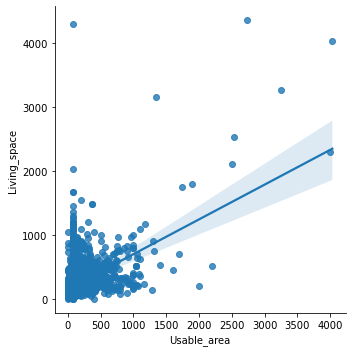

In [14]:
sns.lmplot(x = 'Usable_area', y = 'Living_space', data = df)

#### The more living space the more usable area

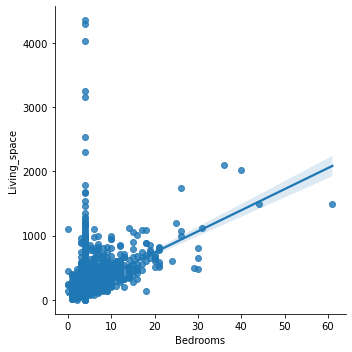

In [15]:
sns.lmplot(x = 'Bedrooms', y = 'Living_space', data = df)

#### The more living space the more bedrooms

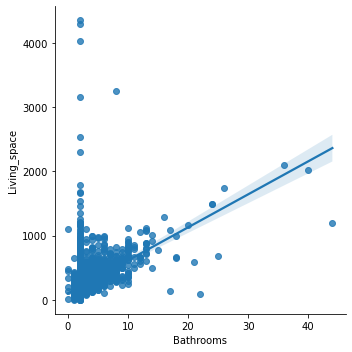

In [16]:
sns.lmplot(x = 'Bathrooms', y = 'Living_space', data = df)

#### The more living space the more bathrooms

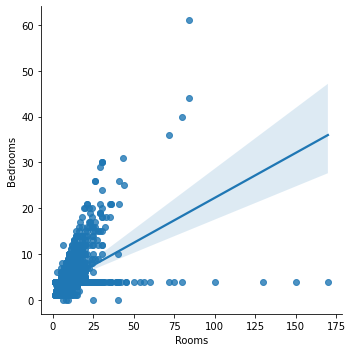

In [17]:
sns.lmplot(x = 'Rooms', y = 'Bedrooms', data = df)

#### The more rooms the more bedrooms

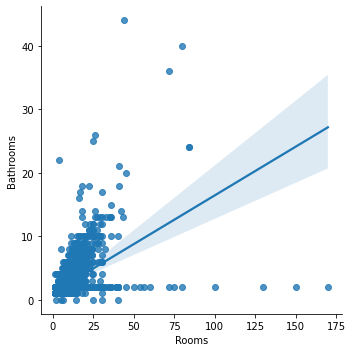

In [18]:
sns.lmplot(x = 'Rooms', y = 'Bathrooms', data = df)

#### The more rooms the more bathrooms

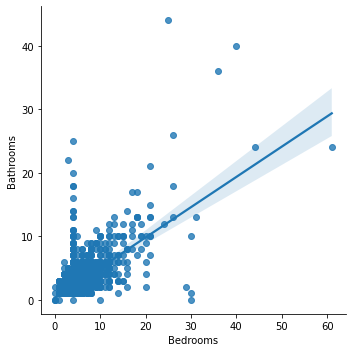

In [19]:
sns.lmplot(x = 'Bedrooms', y = 'Bathrooms', data = df)

#### The more bedrooms the more bathrooms

## 02a. Data exploration of each 'Bundesland'

In [25]:
# creating a subset of each 'Bundesland' and a respective correlation matrix
df['State'].unique()

array(['Baden-Wuerttemberg', 'Rheinland-Pfalz', 'Bayern', 'Hessen',
       'Berlin', 'Brandenburg', 'Bremen', 'Niedersachsen', 'Hamburg',
       'Nordrhein-Westfalen', 'Mecklenburg-Vorpommern',
       'Schleswig-Holstein', 'Saarland', 'Sachsen', 'Sachsen-Anhalt',
       'Thueringen'], dtype=object)

In [28]:
df_bw = df[df['State']=='Baden-Wuerttemberg']

In [33]:
df_rp = df[df['State']=='Rheinland-Pfalz']

In [34]:
df_ba = df[df['State']=='Bayern']

In [35]:
df_he = df[df['State']=='Hessen']

In [36]:
df_be = df[df['State']=='Berlin']

In [37]:
df_br = df[df['State']=='Brandenburg']

In [38]:
df_bn = df[df['State']=='Bremen']

In [39]:
df_ns = df[df['State']=='Niedersachsen']

In [40]:
df_ha = df[df['State']=='Hamburg']

In [41]:
df_nw = df[df['State']=='Nordrhein-Westfalen']

In [42]:
df_mv = df[df['State']=='Mecklenburg-Vorpommern']

In [43]:
df_sh = df[df['State']=='Schleswig-Holstein']

In [44]:
df_sl = df[df['State']=='Saarland']

In [45]:
df_sa = df[df['State']=='Sachsen']

In [46]:
df_st = df[df['State']=='Sachsen-Anhalt']

In [47]:
df_tu = df[df['State']=='Thueringen']

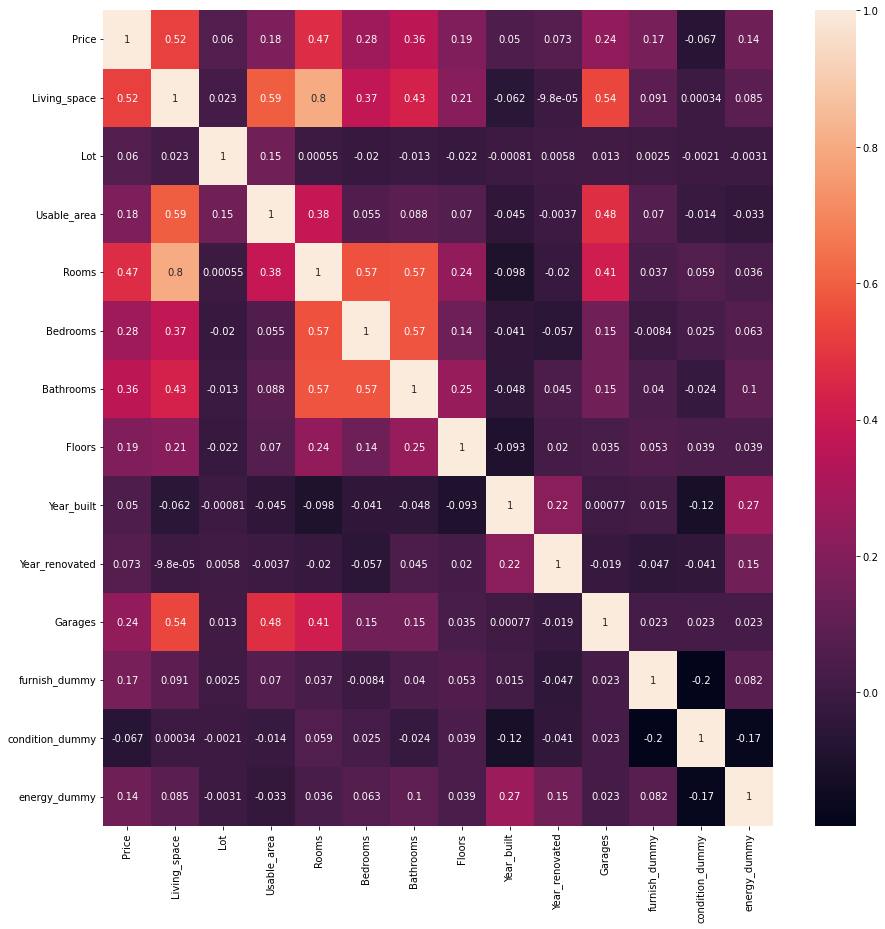

In [31]:
# creating correlation matrix Baden-Würtemberg
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_bw.corr(), annot = True, ax = ax) 

#### Biggest difference is that in Baden-Würtemberg 'Garages' are higher correlated with 'Living_space' than in Germany

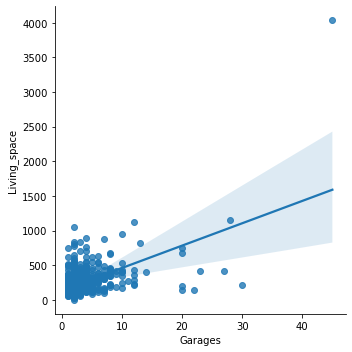

In [59]:
sns.lmplot(x = 'Garages', y = 'Living_space', data = df_bw)

#### The more Garages the higher the price for Baden-Würtemberg.

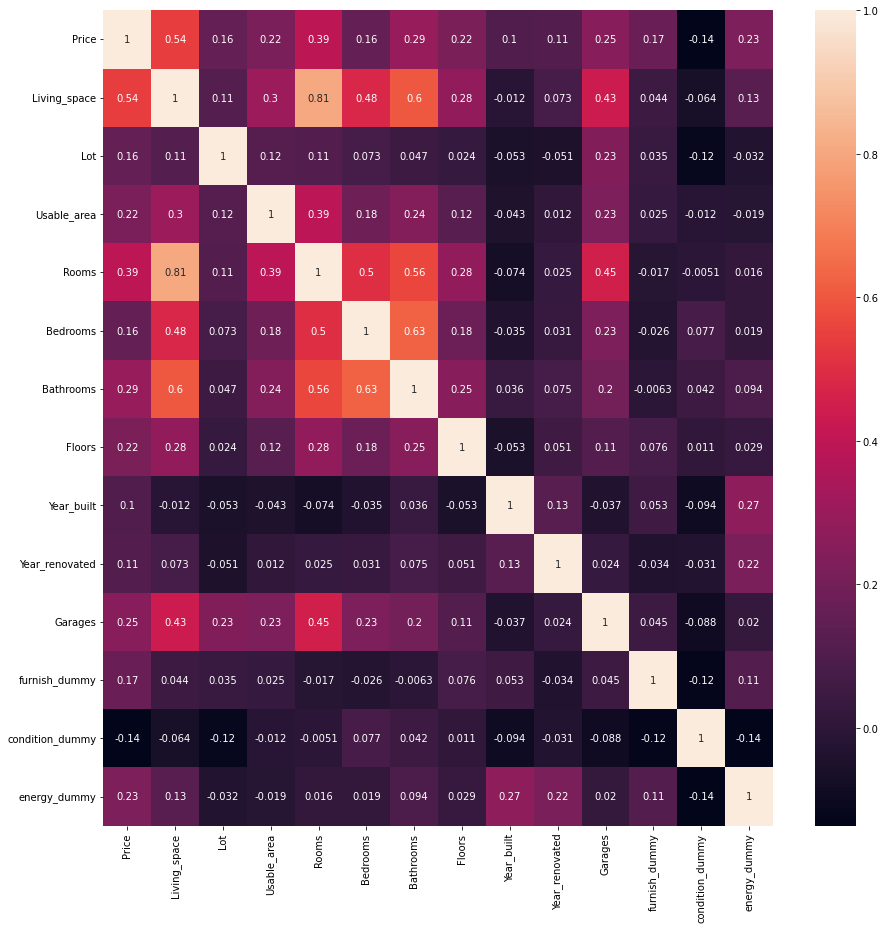

In [48]:
# creating correlation matrix Rheinland-Pfalz
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_rp.corr(), annot = True, ax = ax) 

#### The correlation for Rheinland-Pfalz between 'Living_space' and 'Bathrooms' is higher.

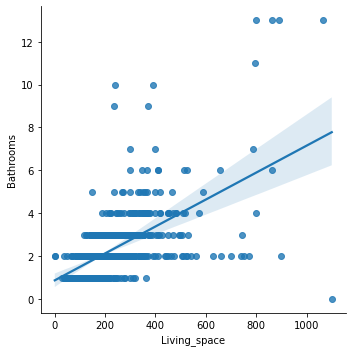

In [60]:
sns.lmplot(x = 'Living_space', y = 'Bathrooms', data = df_rp)

#### The moe living space the more bathrooms for Rheinland-Pfalz

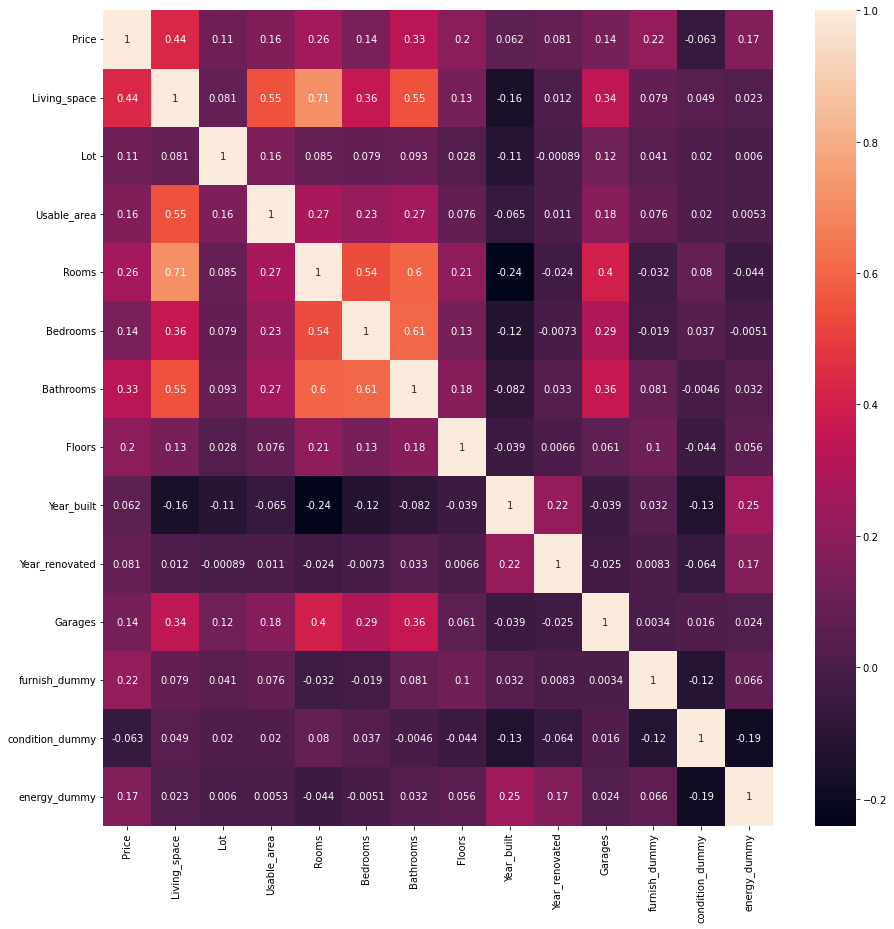

In [49]:
# creating correlation matrix Bayern
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_ba.corr(), annot = True, ax = ax) 

#### The correlation for Bayern between 'Living_space' and 'Rooms' is lower.

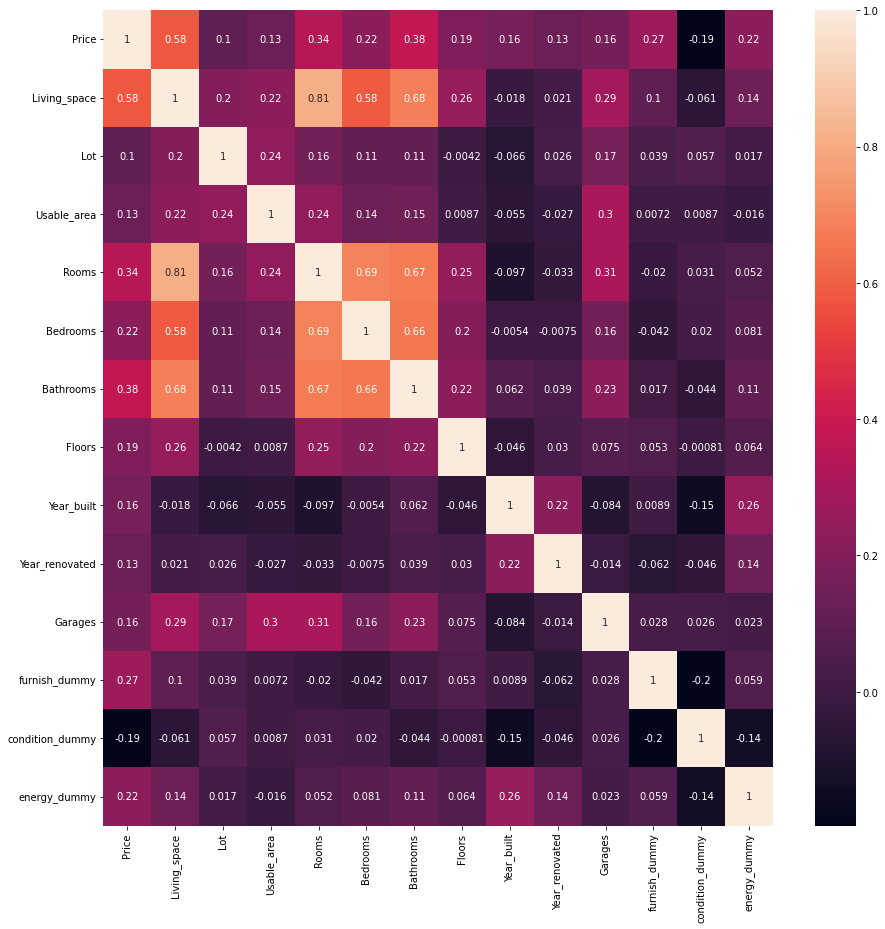

In [50]:
# creating correlation matrix Hessen
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_he.corr(), annot = True, ax = ax) 

#### Not much difference

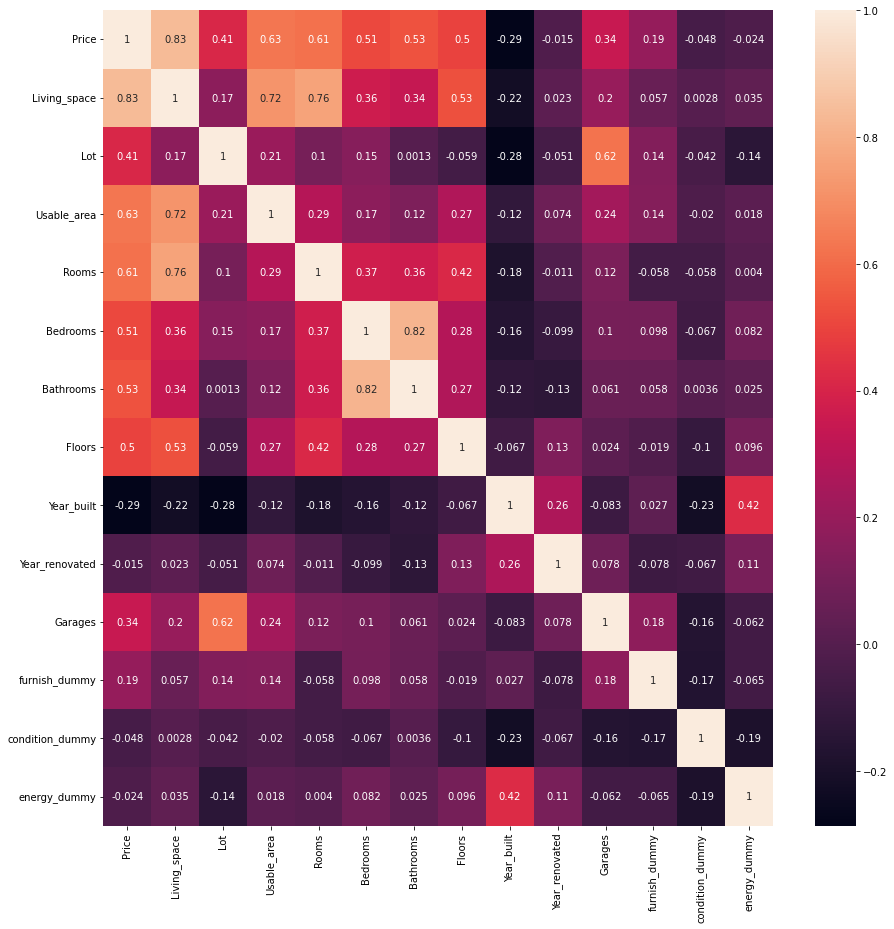

In [51]:
# creating correlation matrix Berlin
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_be.corr(), annot = True, ax = ax) 

#### Berlin is a city and a Bundesland. Therefore we see great difference in correlation between all the variables. Two strong correlation stand out: 'Living_space' and 'Price' and 'Bedrooms' with 'Bathrooms'. Also the correlation between energy_dummy and Year_built is much higher.

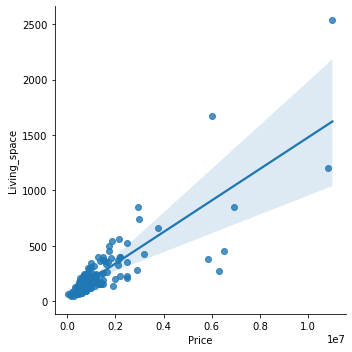

In [57]:
sns.lmplot(x = 'Price', y = 'Living_space', data = df_be)

#### The more living space the higher the price for Berlin.

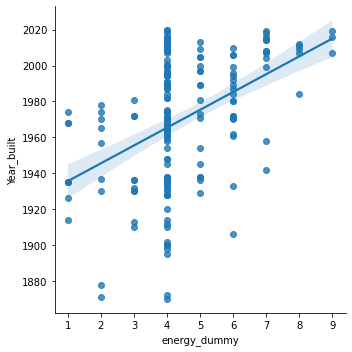

In [63]:
sns.lmplot(x = 'energy_dummy', y = 'Year_built', data = df_be)

#### The newer the building the more energy efficient the buildings are (1=H not efficient, 9=A very efficient)

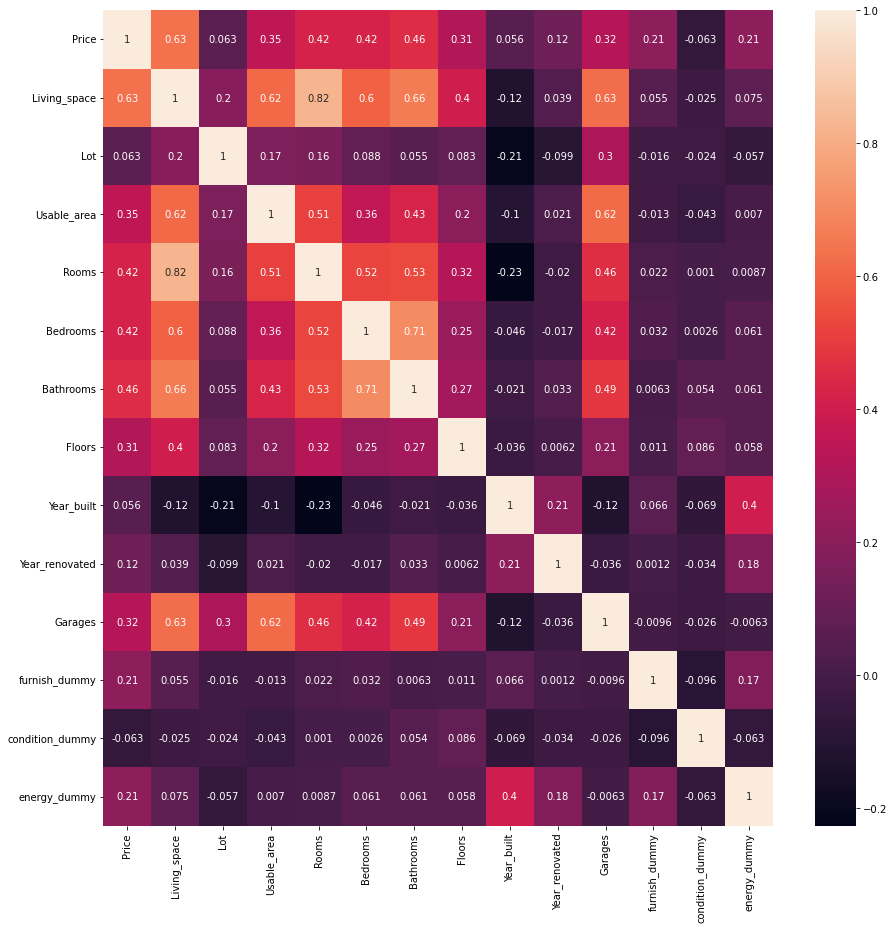

In [52]:
# creating correlation matrix Brandenburg
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_br.corr(), annot = True, ax = ax) 

#### The correlations for Brandenburg between 'Living_space' and 'Usable_area', 'Rooms', 'Bedrooms', 'Bathrooms', 'Garages' are generally higher.

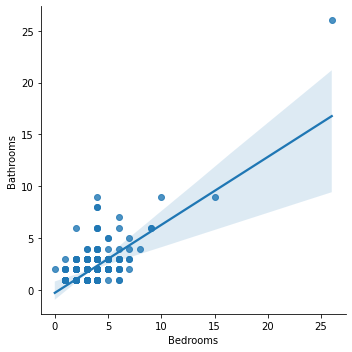

In [56]:
sns.lmplot(x = 'Bedrooms', y = 'Bathrooms', data = df_br)

#### The more Bedrooms the more Bathrooms for Brandenburg.

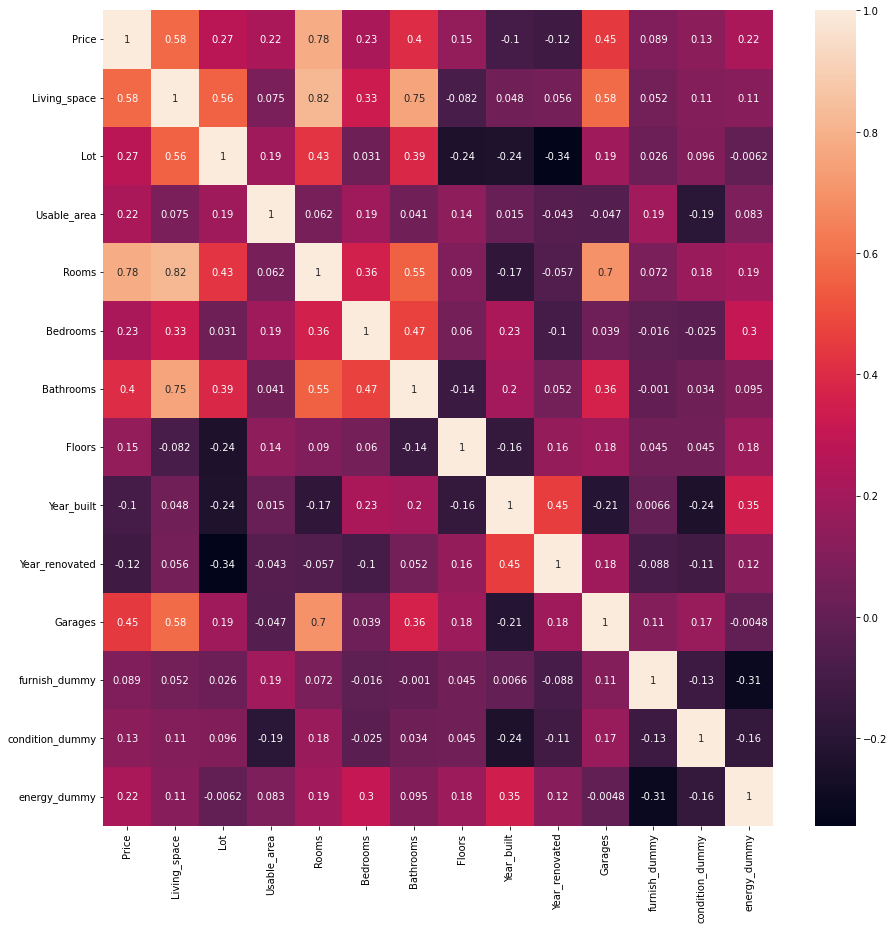

In [53]:
# creating correlation matrix Bremen
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_bn.corr(), annot = True, ax = ax) 

#### In Bremen which is also a city, 'Rooms' have a very strong relationship with 'Price'.

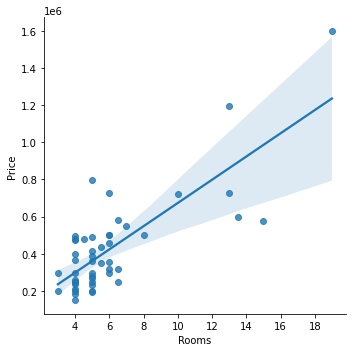

In [55]:
sns.lmplot(x = 'Rooms', y = 'Price', data = df_bn)

#### The more Rooms the higher the Price for Bremen

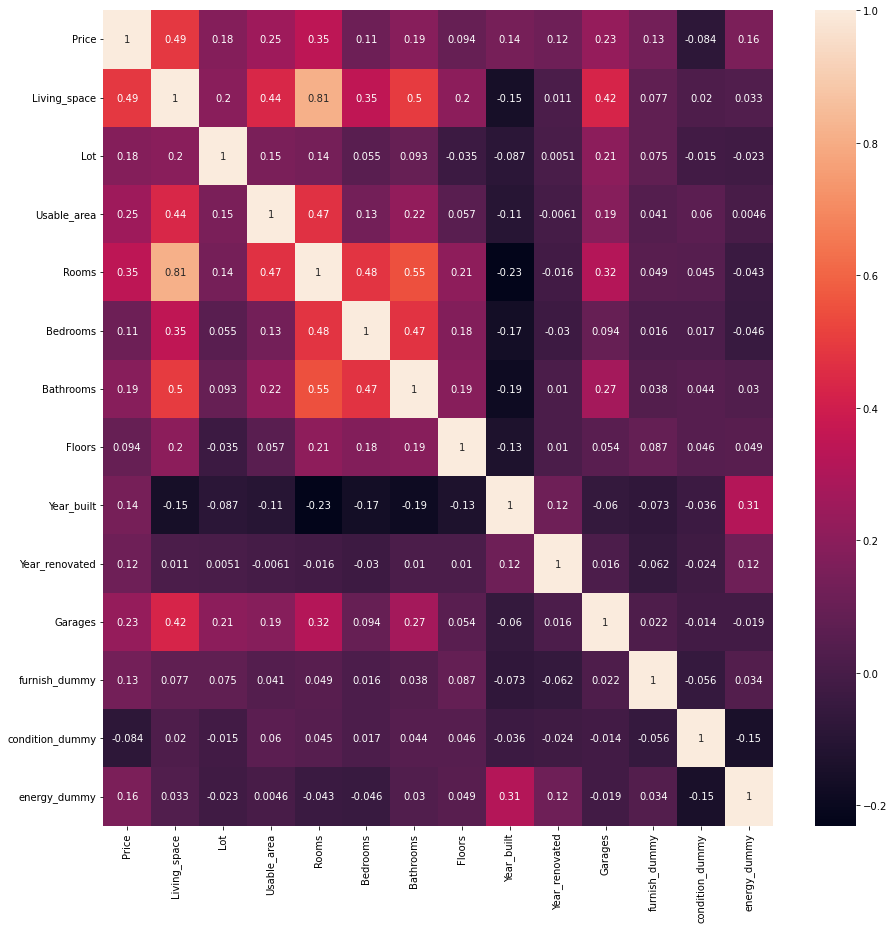

In [61]:
# creating correlation matrix Niedersachsen
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_ns.corr(), annot = True, ax = ax) 

#### Not much difference.

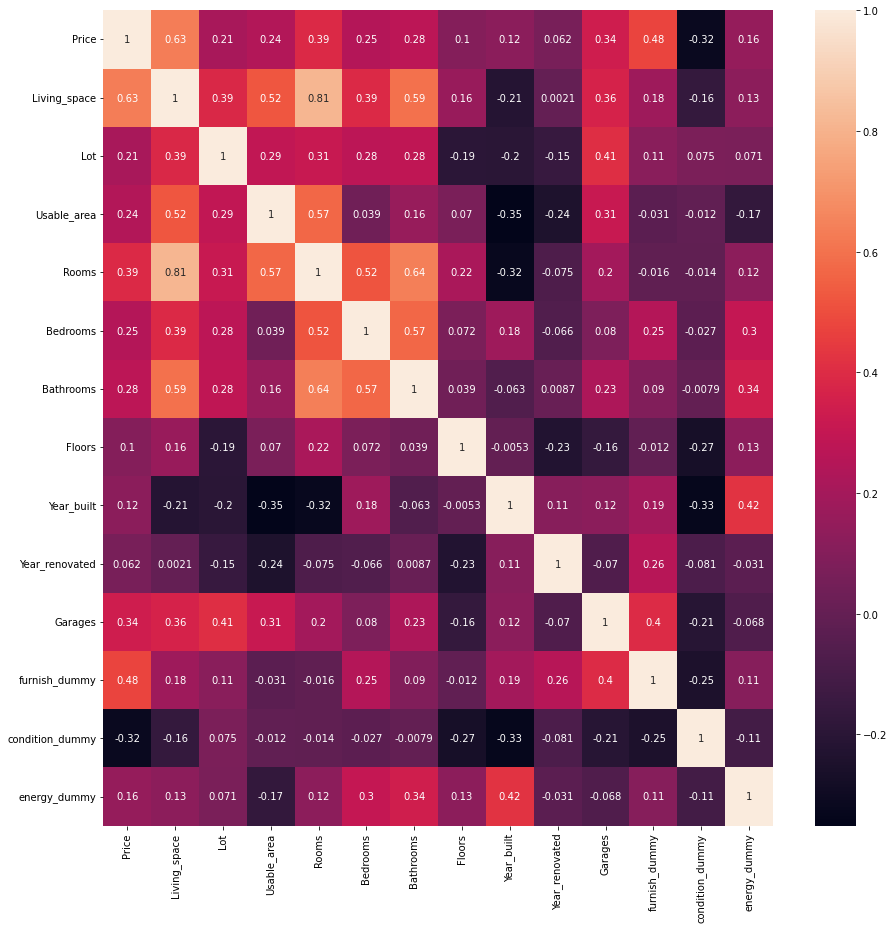

In [62]:
# creating correlation matrix Hamburg
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_ha.corr(), annot = True, ax = ax)

#### Compared to Berlin, Hamburg the correlation between 'Year_built' and 'energy_dummy' is much higher. Also there is a weak negative relationship between 'Year_built' and 'Usable_area'. And 'furnish_dummy' is weak correlated with 'Price'

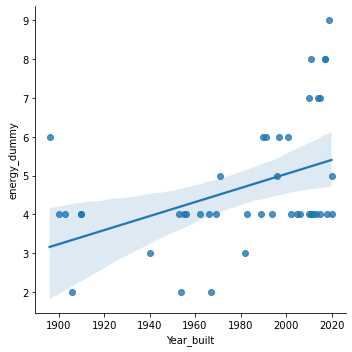

In [64]:
sns.lmplot(x = 'Year_built', y = 'energy_dummy', data = df_ha)

#### The newer the building the more energy efficient the building is for Hamburg.

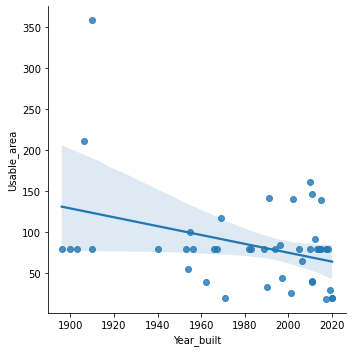

In [65]:
sns.lmplot(x = 'Year_built', y = 'Usable_area', data = df_ha)

#### In Hamburg the newer the building is the less usable area the building has.

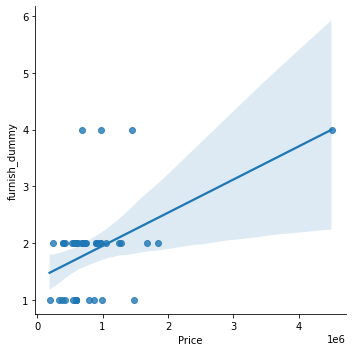

In [66]:
sns.lmplot(x = 'Price', y = 'furnish_dummy', data = df_ha)

#### Nothing much to say here.

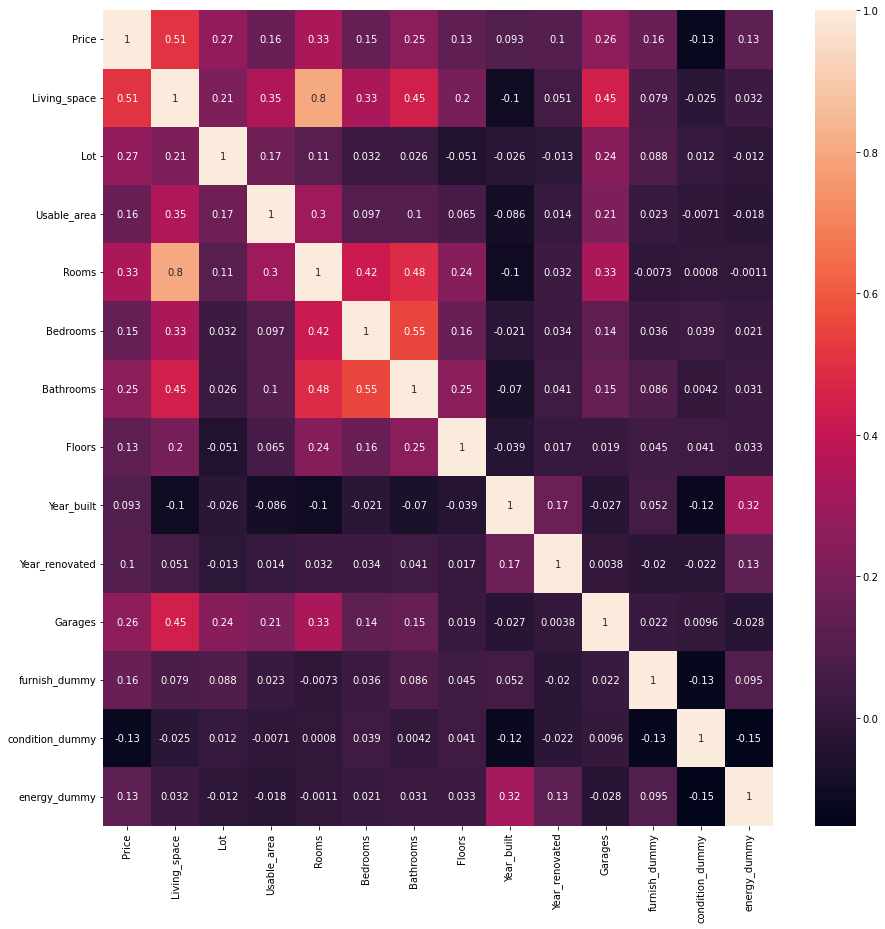

In [67]:
# creating correlation matrix Nordrhein-Westfalen
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_nw.corr(), annot = True, ax = ax) 

#### Nothing special here.

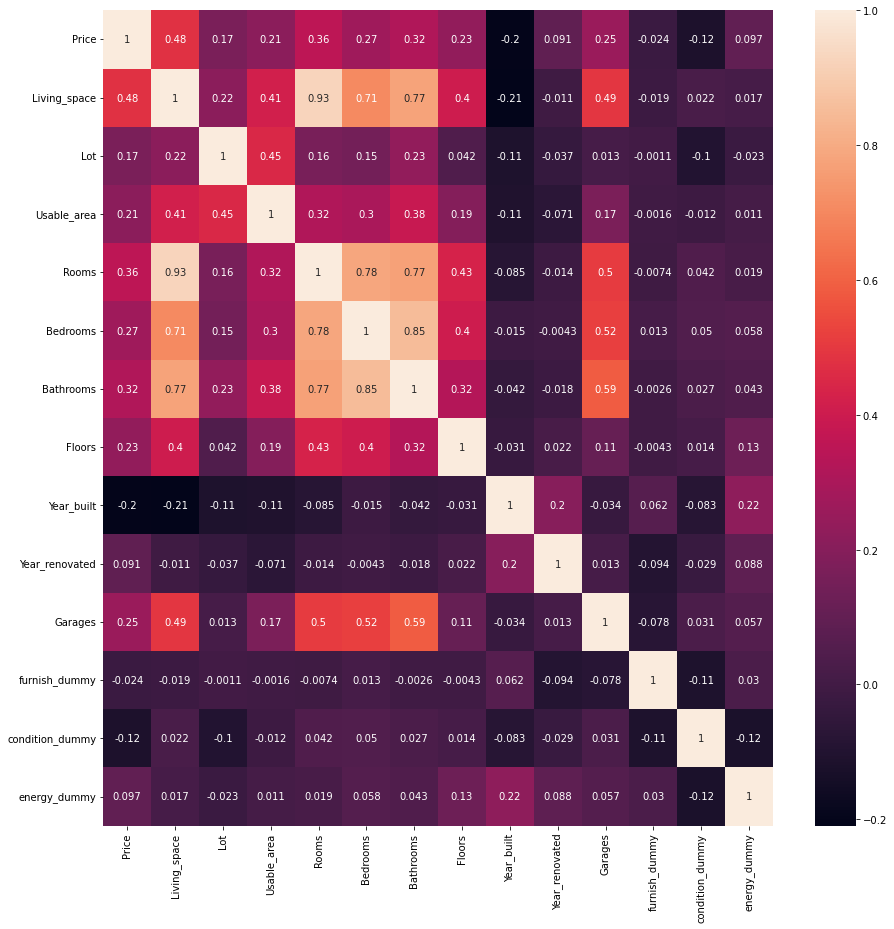

In [68]:
# creating correlation matrix Mecklenburg-Vorpommern
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_mv.corr(), annot = True, ax = ax) 

#### There is a very strong correlation betweetn 'Rooms' and 'Living_space' for Mecklenburg-Vorpommern

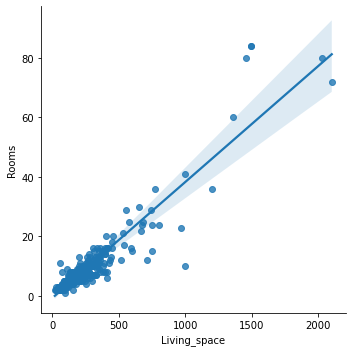

In [70]:
sns.lmplot(x = 'Living_space', y = 'Rooms', data = df_mv)

#### The more living space the more rooms for Mecklenburg-Vorpommern

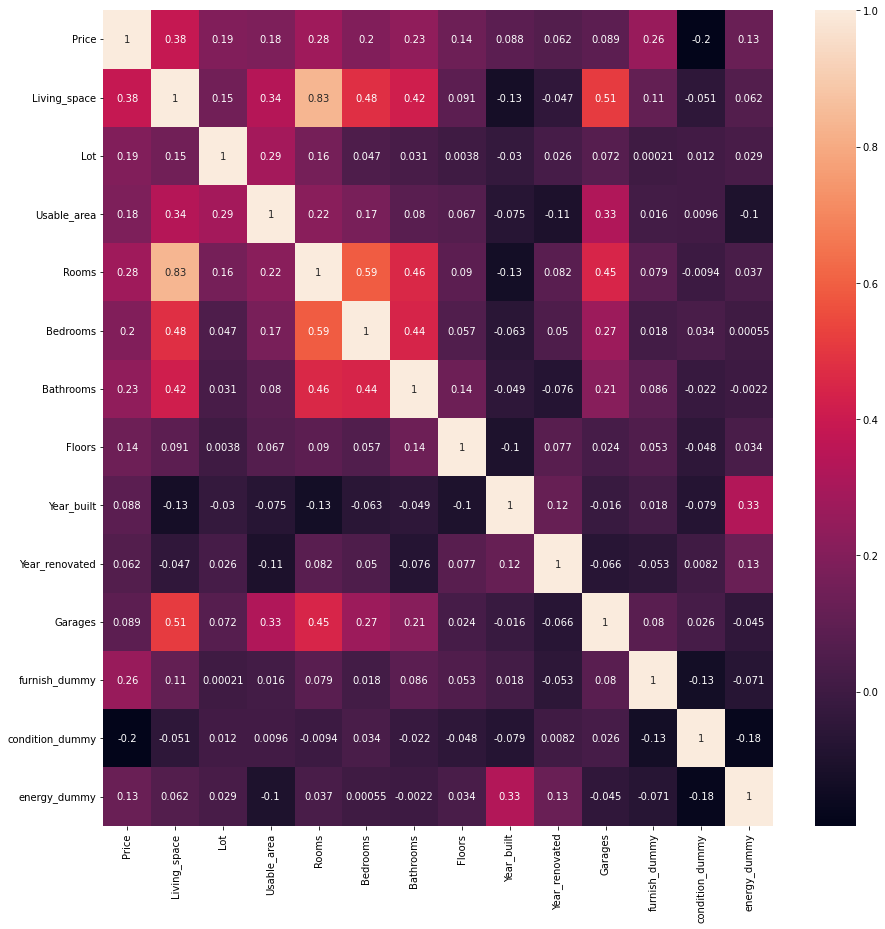

In [71]:
# creating correlation matrix Schleswig-Holstein
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_sh.corr(), annot = True, ax = ax) 

#### nothing special here.

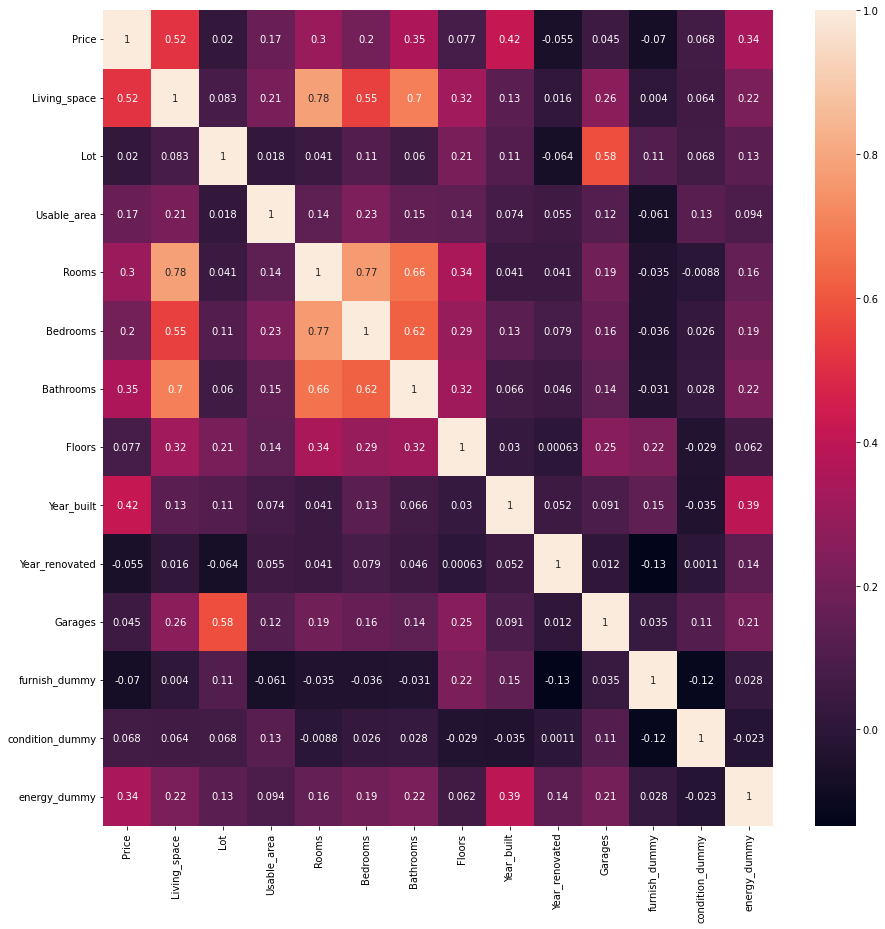

In [72]:
# creating correlation matrix Saarland
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_sl.corr(), annot = True, ax = ax) 

#### There is a strong correlation between 'Bathrooms' and 'Living_space' for Saarland

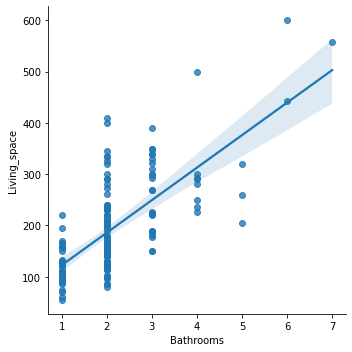

In [73]:
sns.lmplot(x = 'Bathrooms', y = 'Living_space', data = df_sl)

#### The more living space the more bathrooms.

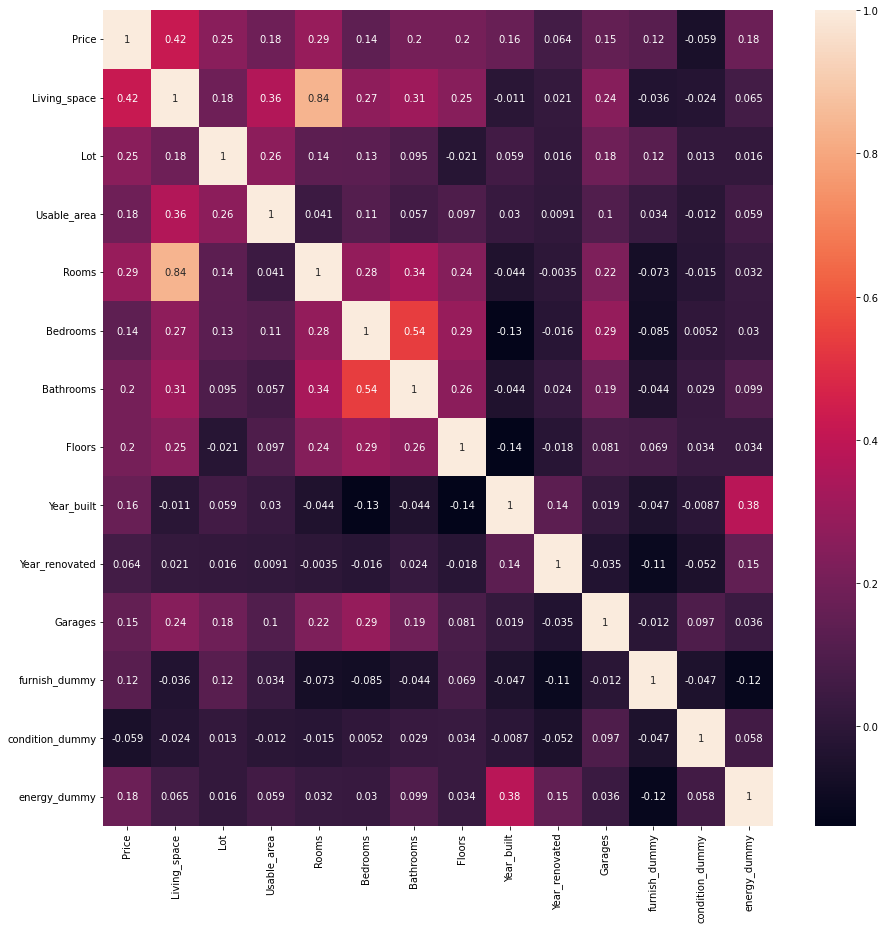

In [74]:
# creating correlation matrix Sachsen
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_sa.corr(), annot = True, ax = ax) 

#### nothing special here for Sachsen

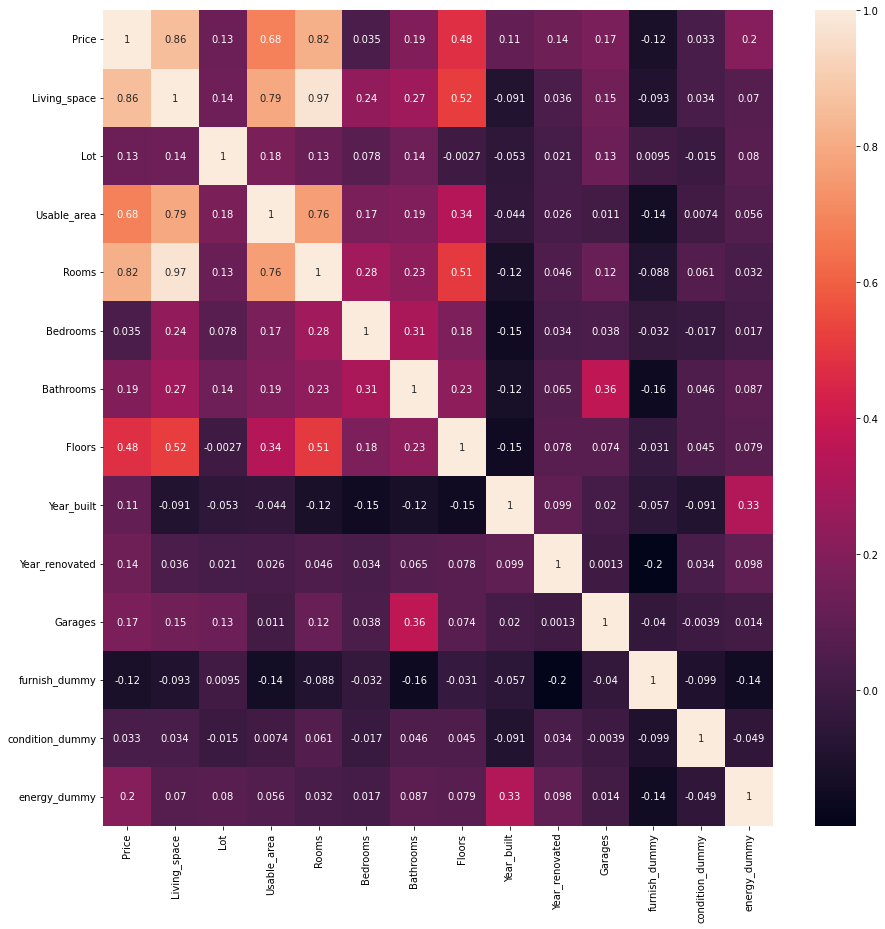

In [75]:
# creating correlation matrix Sachsen-Anhalt
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_st.corr(), annot = True, ax = ax) 

#### The correlation between 'Living_space' and 'Price' is very strong for Sachsen-Anhalt, even though it is not a city.

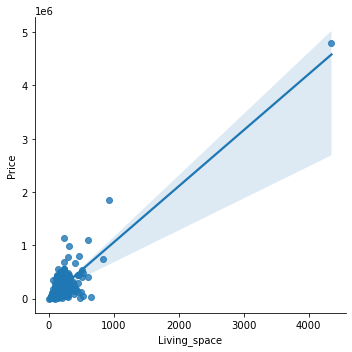

In [76]:
sns.lmplot(x = 'Living_space', y = 'Price', data = df_st)

In [77]:
#### subsetting without the maximum
df_test = df_st[df_st['Living_space'] <=4000] 

In [78]:
df_test.describe()

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,furnish_dummy,condition_dummy,energy_dummy
count,3.470000e+02,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,1.966937e+05,184.404092,1211.735389,112.191239,6.723343,3.838617,1.982709,1.930836,1937.118156,2011.207493,2.328530,1.861671,3.942363,3.809798
std,1.877184e+05,117.570749,1833.874202,103.690840,4.553929,2.685307,1.167845,0.672198,59.914683,7.848099,3.369597,0.731931,1.500335,1.644264
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1600.000000,1976.000000,1.000000,1.000000,1.000000,1.000000
25%,8.000000e+04,110.000000,367.500000,80.000000,4.000000,3.000000,1.000000,2.000000,1900.000000,2008.000000,1.000000,1.000000,3.000000,3.000000
50%,1.499000e+05,150.000000,685.000000,80.000000,5.000000,4.000000,2.000000,2.000000,1936.000000,2015.000000,2.000000,2.000000,4.000000,4.000000
75%,2.500000e+05,230.000000,1379.000000,80.000000,8.000000,4.000000,2.000000,2.000000,1980.000000,2015.000000,2.000000,2.000000,5.000000,4.000000
max,1.850000e+06,930.000000,23410.000000,865.000000,39.000000,30.000000,10.000000,5.000000,2021.000000,2020.000000,58.000000,4.000000,7.000000,9.000000


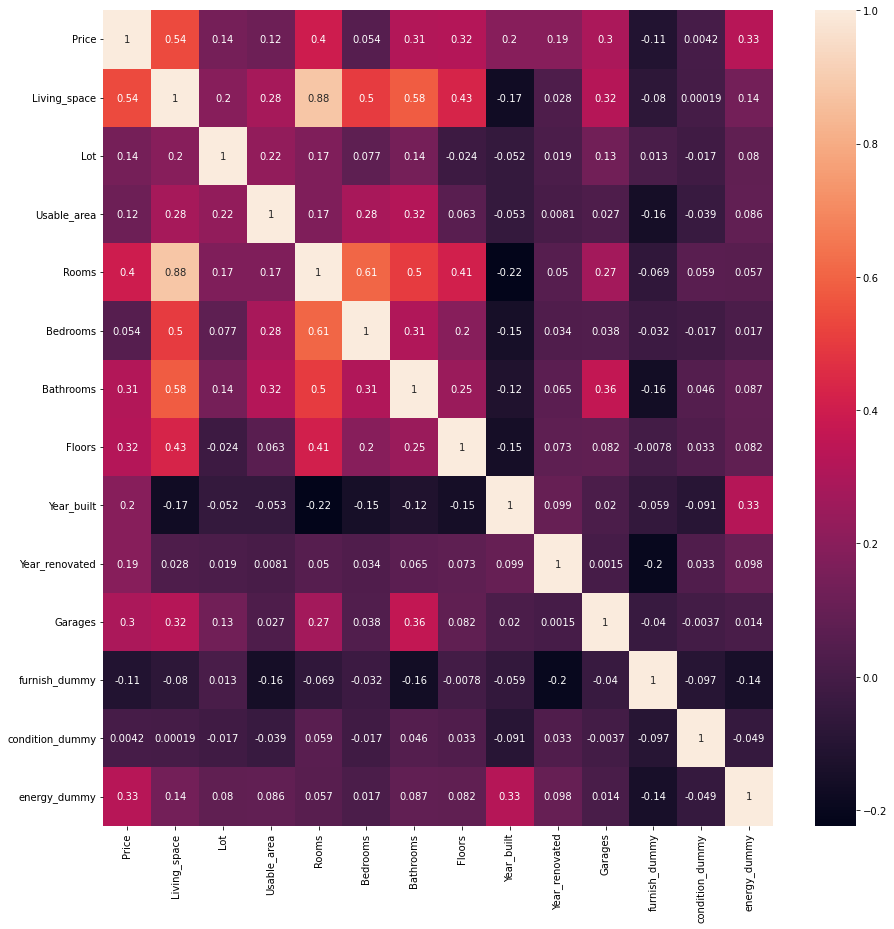

In [80]:
# creating correlation matrix Sachsen-Anhalt
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_test.corr(), annot = True, ax = ax) 

#### Yes, now the correlation is similar to Germany

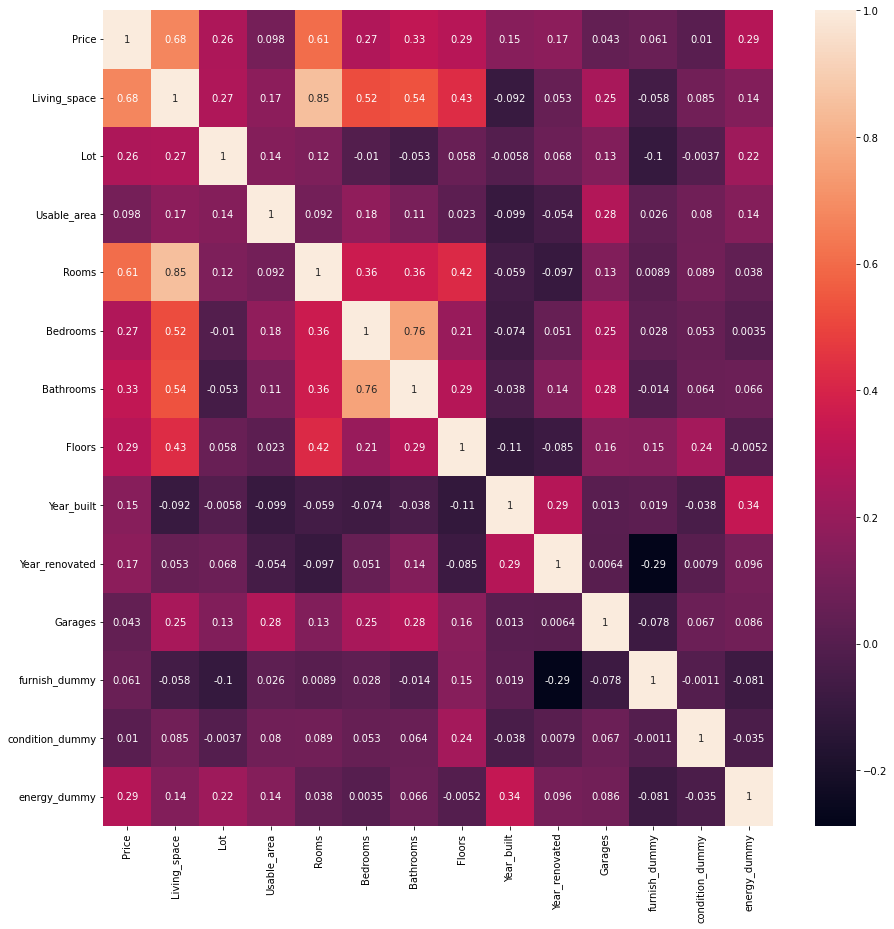

In [81]:
# creating correlation matrix Thueringen
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_tu.corr(), annot = True, ax = ax) 

#### Nothing special for Thueringen.

## 02b. Data exploration for 'West' and 'East'

In [82]:
df['State'].unique()

array(['Baden-Wuerttemberg', 'Rheinland-Pfalz', 'Bayern', 'Hessen',
       'Berlin', 'Brandenburg', 'Bremen', 'Niedersachsen', 'Hamburg',
       'Nordrhein-Westfalen', 'Mecklenburg-Vorpommern',
       'Schleswig-Holstein', 'Saarland', 'Sachsen', 'Sachsen-Anhalt',
       'Thueringen'], dtype=object)

In [113]:
# creating list for eastern states
east_list = ['Mecklenburg-Vorpommern', 'Sachsen', 'Sachsen-Anhalt', 'Brandenburg', 'Berlin']

In [98]:
east_list

['Mecklenburg-Vorpommern',
 'Sachsen',
 'Sachsen-Anhalt',
 'Brandenburg',
 'Berlin']

In [114]:
# subsetting eastern states
df_east = df[df['State'].isin(east_list)]

In [109]:
df_east

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_efficiency_class,State,City,Place,Garages,Garagetype;,furnish_dummy,condition_dummy,energy_dummy,Price category
2635,1650000.0,Villa,260.00,988.0,80.0,NaN,12.0,5.0,2.0,2.0,...,NaN,Berlin,Hermsdorf (Reinickendorf),NaN,2.0,;,1.0,5.0,4.0,High price
2636,1850000.0,Villa,545.00,1378.0,325.0,NaN,12.0,4.0,2.0,2.0,...,NaN,Berlin,Rudow (Neukölln),NaN,1.0,Garage;,4.0,5.0,4.0,High price
2637,398000.0,Mid-terrace house,70.00,676.0,80.0,NaN,3.0,4.0,2.0,2.0,...,NaN,Berlin,Kaulsdorf (Hellersdorf),NaN,1.0,Garage;,3.0,3.0,4.0,Middle price
2638,398000.0,Mid-terrace house,113.00,855.0,80.0,NaN,6.0,4.0,2.0,2.0,...,NaN,Berlin,Bohnsdorf (Treptow),NaN,1.0,Garage;,2.0,5.0,4.0,Middle price
2639,280000.0,Mid-terrace house,90.13,531.0,80.0,NaN,4.0,4.0,2.0,2.0,...,F,Berlin,Gruenau (Köpenick),NaN,1.0,Outside parking lot;,2.0,3.0,3.0,Middle price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9822,69000.0,NaN,129.00,129.0,129.0,NaN,5.0,4.0,2.0,2.0,...,NaN,Sachsen-Anhalt,Salzlandkreis,Calbe (Saale),1.0,Outside parking lot;,1.0,5.0,4.0,Low price
9823,450000.0,Duplex,300.00,225.0,50.0,NaN,10.0,3.0,3.0,2.0,...,NaN,Sachsen-Anhalt,Harz (Kreis),Wernigerode,2.0,;,2.0,3.0,4.0,Middle price
9824,125000.0,Residential property,200.00,1500.0,80.0,NaN,10.0,4.0,2.0,2.0,...,NaN,Sachsen-Anhalt,Harz (Kreis),Sargstedt,1.0,Outside parking lot;,2.0,5.0,4.0,Low price
9825,82000.0,NaN,140.00,1200.0,30.0,NaN,4.0,3.0,1.0,1.0,...,NaN,Sachsen-Anhalt,Harz (Kreis),Halberstadt,2.0,Outside parking lot;,1.0,7.0,4.0,Low price


In [115]:
# creating list for western states
west_list = ['Baden-Wuerttemberg', 'Rheinland-Pfalz', 'Bayern', 'Hessen', 'Bremen', 'Niedersachsen', 'Hamburg',
       'Nordrhein-Westfalen', 'Schleswig-Holstein', 'Saarland', 'Thueringen']

In [116]:
# subsettting df for western states
df_west = df[df['State'].isin(west_list)]

In [108]:
df_west

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_efficiency_class,State,City,Place,Garages,Garagetype;,furnish_dummy,condition_dummy,energy_dummy,Price category
0,498000.0,Multiple dwelling,106.00,229.0,80.0,01.10.2020,5.5,3.0,1.0,2.0,...,D,Baden-Wuerttemberg,Bodenseekreis,Bermatingen,2.0,Parking lot;,2.0,5.0,5.0,Middle price
1,495000.0,Mid-terrace house,140.93,517.0,20.0,01.01.2021,6.0,3.0,2.0,2.0,...,NaN,Baden-Wuerttemberg,Konstanz (Kreis),Engen,7.0,Parking lot;,1.0,5.0,4.0,Middle price
3,259000.0,Farmhouse,140.00,814.0,80.0,nach Vereinbarung,4.0,4.0,2.0,2.0,...,G,Baden-Wuerttemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage;,1.0,2.0,2.0,Middle price
4,469000.0,Multiple dwelling,115.00,244.0,80.0,sofort,4.5,2.0,1.0,2.0,...,F,Baden-Wuerttemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage;,3.0,4.0,3.0,Middle price
5,1400000.0,Mid-terrace house,310.00,860.0,100.0,sofort,8.0,4.0,2.0,3.0,...,NaN,Baden-Wuerttemberg,Stuttgart,Sued,2.0,Garage;,1.0,3.0,4.0,High price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10534,35500.0,Special property,47.00,1400.0,80.0,sofort,2.0,1.0,1.0,1.0,...,NaN,Thueringen,Saale-Orla-Kreis,Pößneck,1.0,Garage;,3.0,3.0,4.0,Low price
10535,38000.0,Farmhouse,110.00,471.0,110.0,sofort,5.0,2.0,1.0,3.0,...,NaN,Thueringen,Unstrut-Hainich-Kreis,Bad Tennstedt,2.0,Outside parking lot;,3.0,4.0,4.0,Low price
10536,348000.0,NaN,200.00,1610.0,650.0,sofort,7.0,5.0,2.0,2.0,...,NaN,Thueringen,Eichsfeld (Kreis),Bernterode (bei Heilbad Heiligenstadt),6.0,Duplex lot;,2.0,6.0,4.0,Middle price
10537,472500.0,Duplex,485.00,320.0,135.0,sofort,15.0,11.0,4.0,3.0,...,NaN,Thueringen,Unstrut-Hainich-Kreis,Muehlhausen/Thueringen,4.0,Outside parking lot;,2.0,2.0,4.0,Middle price


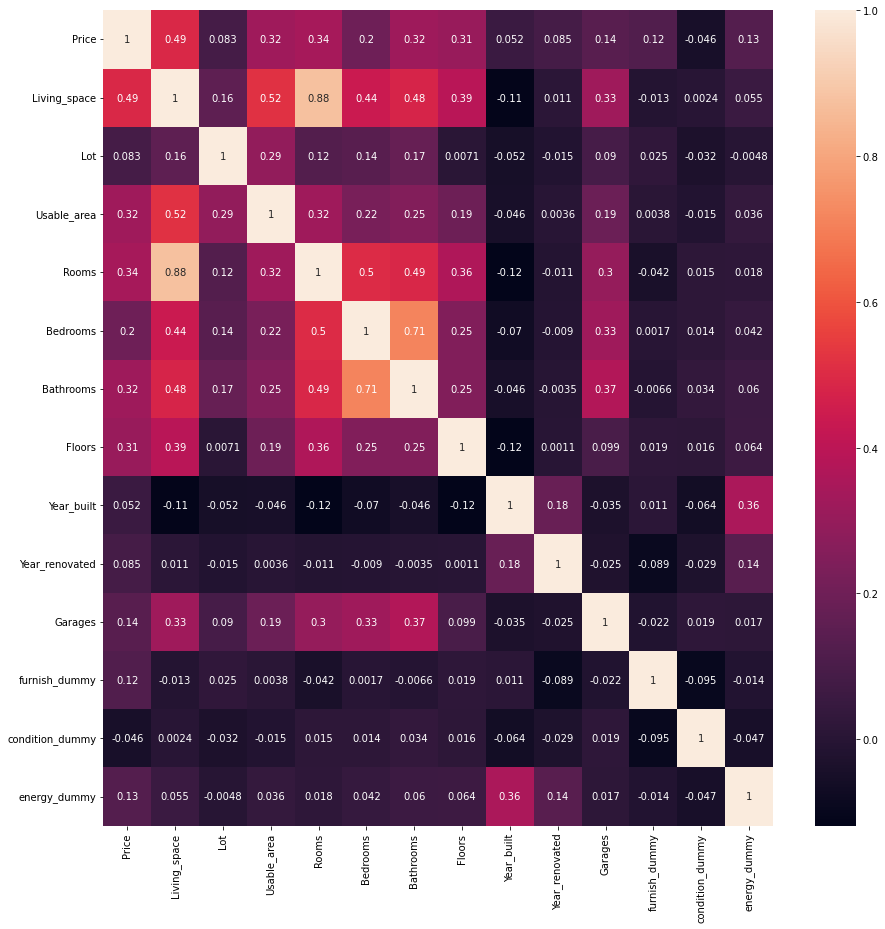

In [162]:
# creating correlation matrix EAST
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_east.corr(), annot = True, ax = ax)

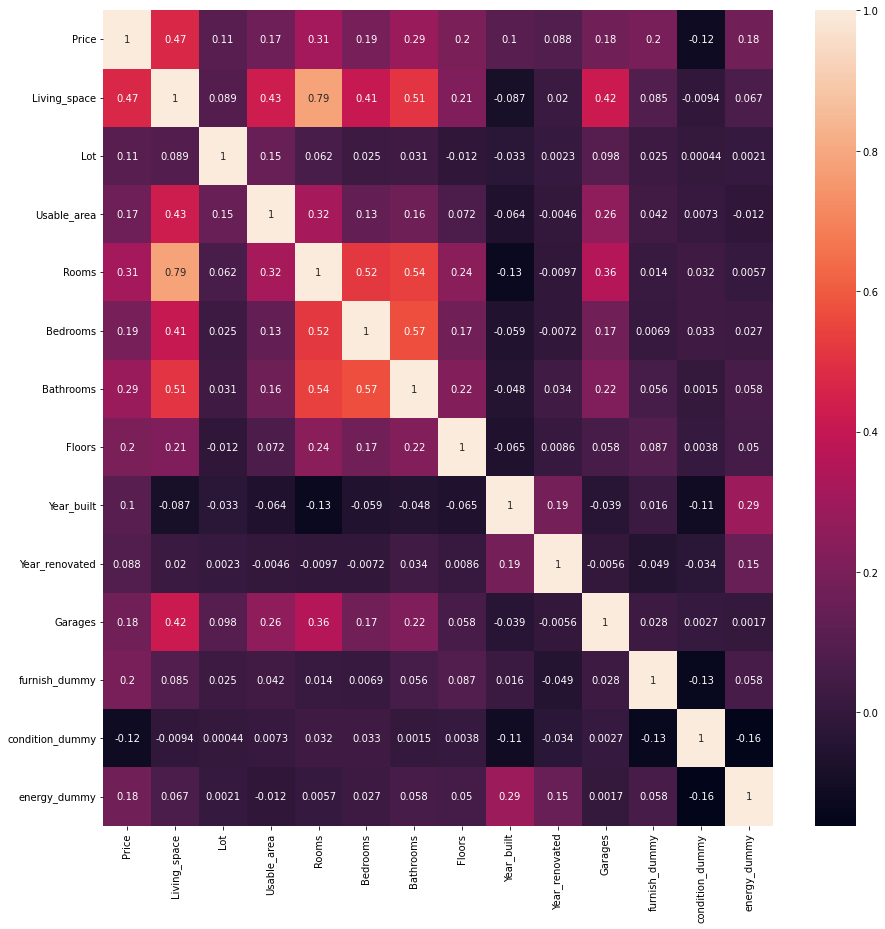

In [164]:
# creating correlation matrix WEST
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_west.corr(), annot = True, ax = ax) 

#### There is no meaningfull difference between East and West. Execpt that there are a lot less dataset in the east than in the west.

In [163]:
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','corr_east.jpg'))

In [165]:
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','corr_west.jpg'))

## 02c. Data exploration for 'City'-States and non-'City'-states

In [112]:
df['State'].unique()

array(['Baden-Wuerttemberg', 'Rheinland-Pfalz', 'Bayern', 'Hessen',
       'Berlin', 'Brandenburg', 'Bremen', 'Niedersachsen', 'Hamburg',
       'Nordrhein-Westfalen', 'Mecklenburg-Vorpommern',
       'Schleswig-Holstein', 'Saarland', 'Sachsen', 'Sachsen-Anhalt',
       'Thueringen'], dtype=object)

In [ ]:
city_list = ['Hamburg', 'Bremen', 'Berlin']

In [118]:
# subsetting city states
df_city = df[df['State'].isin(city_list)]

In [159]:
df_city.shape

(291, 28)

In [119]:
non_city_list = ['Baden-Wuerttemberg', 'Rheinland-Pfalz', 'Bayern', 'Hessen', 'Niedersachsen', 'Saarland', 'Thueringen', 
       'Nordrhein-Westfalen', 'Schleswig-Holstein', 'Mecklenburg-Vorpommern', 'Sachsen', 'Sachsen-Anhalt', 'Brandenburg']

In [120]:
# subsetting non-city states
df_non_city = df[df['State'].isin(non_city_list)]

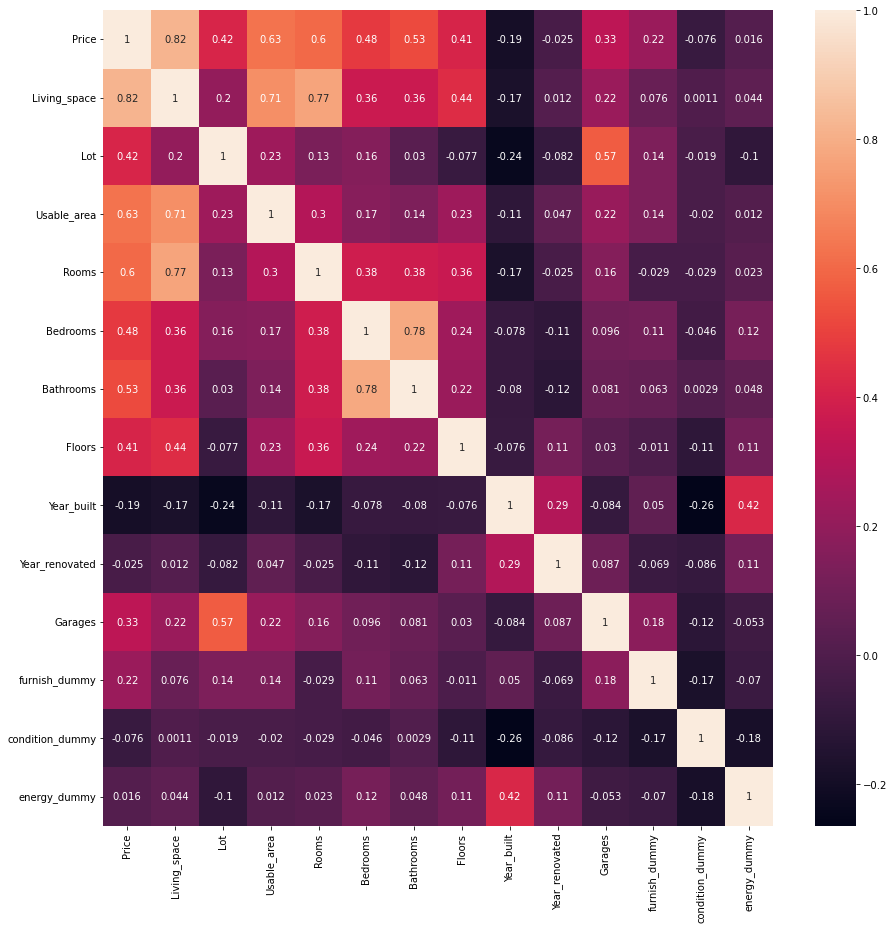

In [166]:
# creating correlation matrix City states
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_city.corr(), annot = True, ax = ax)

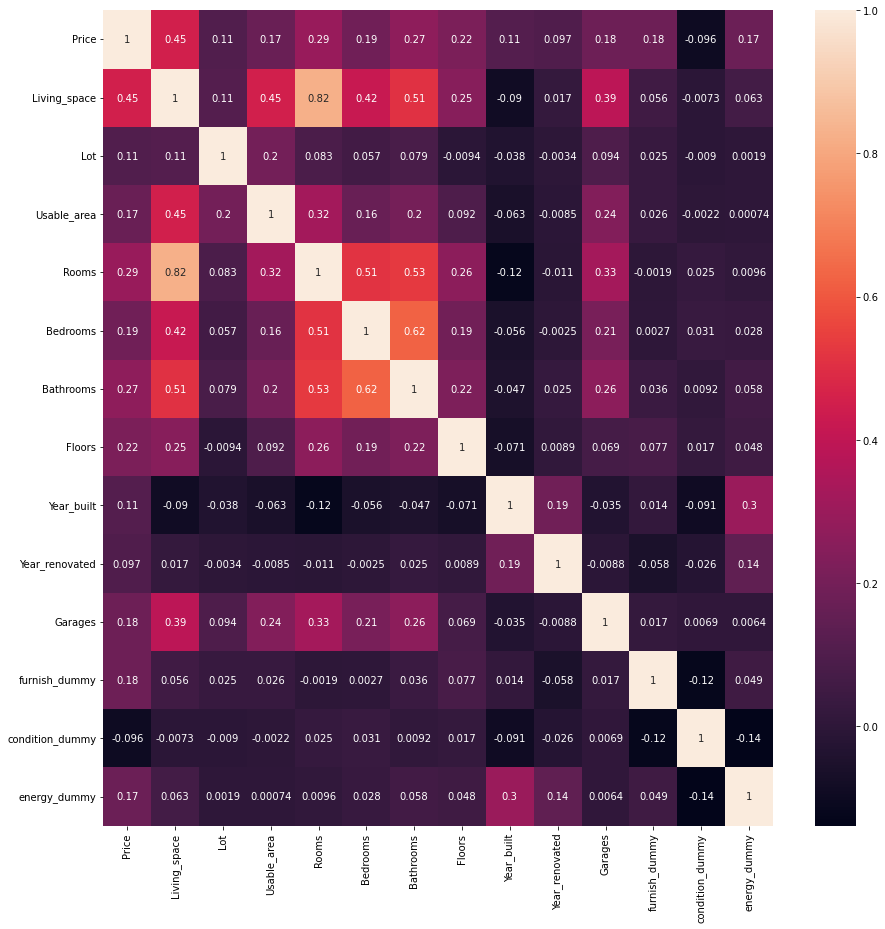

In [168]:
# creating correlation matrix non-City states
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_non_city.corr(), annot = True, ax = ax)

#### Here the difference is rather meaningfull. The correlation between 'Living_space' and price is in city-states much higher. Also the relationship between 'Rooms', 'Bedrooms', 'Bathrooms', 'Floors', 'Garages' and 'Price' is much stronger. 

In [167]:
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','corr_city.jpg'))

In [169]:
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','corr_non_city.jpg'))

## 03. Preparing data for regression analysis

## 03a. Preparing data for Germany

## 03aa. Price vs. Living_space

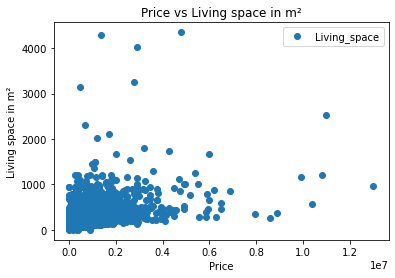

In [6]:
# Create a scatterplot 'Price' vs. 'Living_space'

df.plot(x = 'Price', y='Living_space',style='o')
plt.title('Price vs Living space in m²')  
plt.xlabel('Price')  
plt.ylabel('Living space in m²')  
plt.show()

In [7]:
# Reshape the variables into NumPy arrays Price Living_space.

X = df['Living_space'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [8]:
# Split data into a training set and a test set Price Living_space

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 03ab. Living_space vs. Rooms

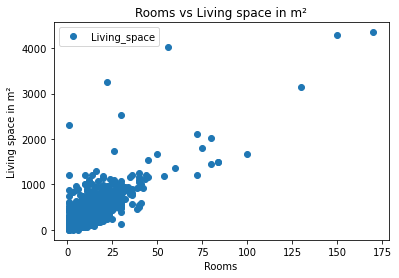

In [227]:
# Create a scatterplot 'Rooms' vs. 'Living_space'

df.plot(x = 'Rooms', y='Living_space',style='o')
plt.title('Rooms vs Living space in m²')  
plt.xlabel('Rooms')  
plt.ylabel('Living space in m²')  
plt.show()

In [228]:
# Reshape the variables into NumPy arrays.

X = df['Living_space'].values.reshape(-1,1)
y = df['Rooms'].values.reshape(-1,1)

In [229]:
# Split data into a training set and a test set Rooms Living_space

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 03ac. Bathrooms vs. Bedrooms

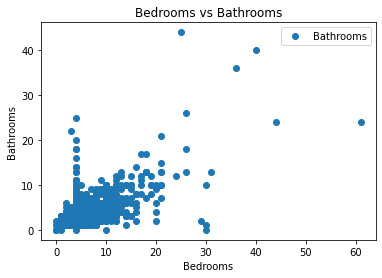

In [237]:
# Create a scatterplot 'Bedrooms' vs. 'Bathrooms'

df.plot(x = 'Bedrooms', y='Bathrooms',style='o')
plt.title('Bedrooms vs Bathrooms')  
plt.xlabel('Bedrooms')  
plt.ylabel('Bathrooms')  
plt.show()

In [238]:
# Reshape the variables into NumPy arrays.

X = df['Bedrooms'].values.reshape(-1,1)
y = df['Bathrooms'].values.reshape(-1,1)

In [239]:
# Split data into a training set and a test set Rooms Living_space

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 03b. Preparing Data City-States

## 03ba. Price vs. Living_space

In [262]:
# Reshape the variables into NumPy arrays and put them into separate objects Price Living_space.

X = df_city['Living_space'].values.reshape(-1,1)
y = df_city['Price'].values.reshape(-1,1)

In [263]:
# Split data into a training set and a test set Price Living_space

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 04. Regression Analyis

## 04a. Regression Analysis Germany

## 04aa. Regression Analysis Price vs. Living_space

In [9]:
# Create a regression object.

regression = LinearRegression()

In [10]:
# Fit the regression object onto the training set Price Living_space

regression.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predict the values of y using X Price Living_space

y_predicted = regression.predict(X_test)

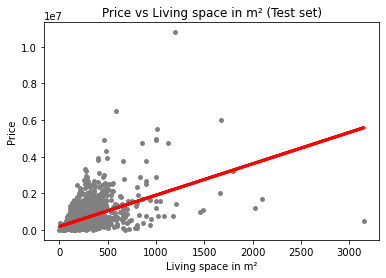

In [12]:
# Create a regression plot from the model on the test set Price Living_space.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Living space in m² (Test set)')
plot_test.xlabel('Living space in m²')
plot_test.ylabel('Price')
plot_test.show()

In [13]:
# Create objects that contain the model summary statistics, Price Living_space.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [14]:
# Print the model summary statistics, Price Living_space.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1713.35152068]]
Mean squared error:  239043726815.62402
R2 score:  0.2392678175577755


In [226]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,425000.0,5.313056e+05
1,430000.0,4.970385e+05
2,139900.0,4.113709e+05
3,559000.0,6.306799e+05
4,375000.0,4.010908e+05
5,415000.0,6.598069e+05
6,1430000.0,7.418936e+05
7,595000.0,3.822440e+05
8,405000.0,5.998396e+05
9,120000.0,5.313056e+05


#### Very weak R2

### Compare how the regression fits the training set

In [15]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [16]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

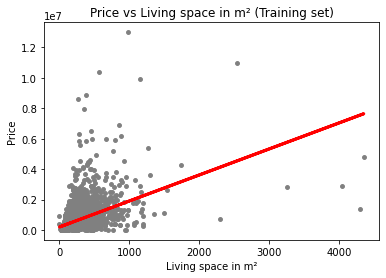

In [18]:
# Create a regression plot from the model on the test set Price Living_space.

plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs Living space in m² (Training set)')
plot_test.xlabel('Living space in m²')
plot_test.ylabel('Price')
plot_test.show()

In [19]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1713.35152068]]
Mean squared error:  311651291666.17755
R2 score:  0.21105204777869369


### Even a weaker R2 for the training set.

## 04ab. Regression Analysis Rooms vs. Living_space

In [230]:
# Create a regression object.

regression = LinearRegression()

In [231]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [232]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

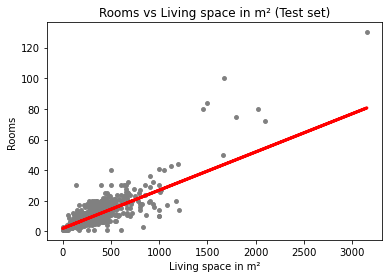

In [233]:
# Create a regression plot from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Rooms vs Living space in m² (Test set)')
plot_test.xlabel('Living space in m²')
plot_test.ylabel('Rooms')
plot_test.show()

In [234]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [235]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02497249]]
Mean squared error:  10.264385559503127
R2 score:  0.7103857957854474


#### The fit R2 is quite good.

In [236]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.0,6.958047
1,6.0,6.458598
2,5.0,5.209973
3,9.0,8.406452
4,5.0,5.060138
5,9.0,8.830984
6,8.0,10.027416
7,4.0,4.785441
8,9.0,7.956947
9,7.0,6.958047


#### The prediction is quite good. But it seems to have problems with high rooms numbers.

### Compare how the regression fits the training set

In [189]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

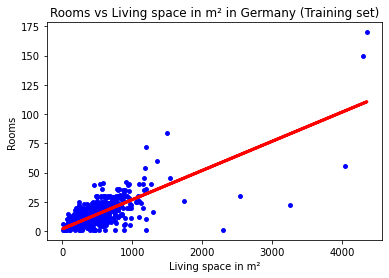

In [190]:
# Create a regression plot from the model on the test set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Rooms vs Living space in m² in Germany (Training set)')
plot_test.xlabel('Living space in m²')
plot_test.ylabel('Rooms')
plot_test.show()

In [191]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [192]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02497249]]
Mean squared error:  9.581070647758004
R2 score:  0.6489419261672849


#### The fit for the training set is not a good as the test set, but still not so bad.

## 04ac. Regression Analysis Bedrooms vs. Bathrooms

In [240]:
# Create a regression object.

regression = LinearRegression()

In [241]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [242]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

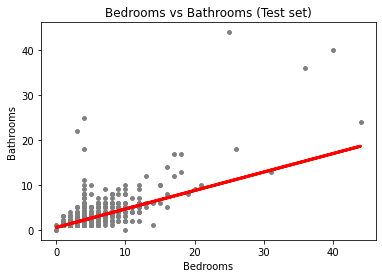

In [243]:
# Create a regression plot from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Bedrooms vs Bathrooms (Test set)')
plot_test.xlabel('Bedrooms')
plot_test.ylabel('Bathrooms')
plot_test.show()

In [244]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [245]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.41102384]]
Mean squared error:  395823122430.5371
R2 score:  -192877737154.8502


#### Quite odd, the R2 is negative. So is not a good fit.

In [246]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.0,2.601657
1,1.0,1.779609
2,1.0,1.779609
3,2.0,3.012680
4,3.0,2.190633
5,2.0,2.190633
6,2.0,2.190633
7,2.0,2.190633
8,3.0,3.423704
9,2.0,2.190633


### Compare how the regression fits the training set

In [247]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

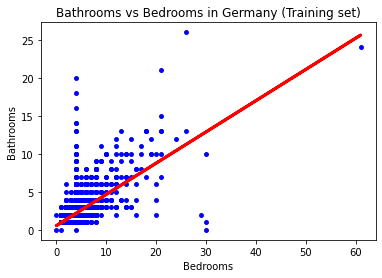

In [203]:
# Create a regression plot from the model on the test set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Bathrooms vs Bedrooms in Germany (Training set)')
plot_test.xlabel('Bedrooms')
plot_test.ylabel('Bathrooms')
plot_test.show()

In [248]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [249]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.41102384]]
Mean squared error:  1.3483851970898457
R2 score:  0.34295529772954403


#### Also regression with the training set suggests, that Bathrooms can not be explaind by Bedrooms.

## 04b. Regression Analysis City-states

In [264]:
# Create a regression object.

regression = LinearRegression()

In [265]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [266]:
# Predict the values of y using X, Price Living_space.

y_predicted = regression.predict(X_test)

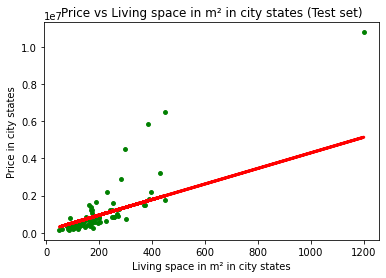

In [267]:
# Create a plot that shows the regression line from the model on the test set, Price Living_space.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Living space in m² in city states (Test set)')
plot_test.xlabel('Living space in m² in city states')
plot_test.ylabel('Price in city states')
plot_test.show()

In [268]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [269]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4198.51853913]]
Mean squared error:  1038892869968.1285
R2 score:  0.5313246878544182


#### Much higher R2 but also not a good fit. 

In [274]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,230000.0,6.089183e+05
1,589000.0,6.928887e+05
2,365000.0,5.278869e+05
3,770000.0,7.395762e+05
4,667000.0,7.348738e+05
5,559000.0,6.886901e+05
6,355000.0,5.543375e+05
7,449000.0,5.780172e+05
8,1500000.0,1.650151e+06
9,150000.0,3.150220e+05


### Compare how the regression fits the training set City-States

In [270]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

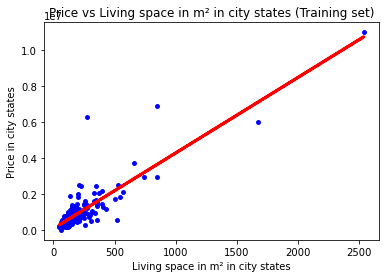

In [271]:
# Create a plot that shows the regression line from the model on the training set, Price Living_space

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs Living space in m² in city states (Training set)')
plot_test.xlabel('Living space in m² in city states')
plot_test.ylabel('Price in city states')
plot_test.show()

In [272]:
rmse = mean_squared_error(ycprice_train, ycprice_predicted_train)
r2 = r2_score(ycprice_train, ycprice_predicted_train)

In [273]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4198.51853913]]
Mean squared error:  318411203765.6514
R2 score:  0.7484656103111826


#### For the training set, the fit is quite good. A problem could be that the sample size is relatively small, with just 291 data rows for the whole group. To better understand, I need to differentiate between cities and the countryside.

## 05. My Thougths

#### I found two good predicters. First, Living_space could explain Price in the subset City-States very well. But that finding needs to be taken with a grain of salt because the subset only contains 291 data rows. To give the discovery a better basis, I need to find a way to filter the data deeper into cities and the countryside.
#### And the other was Living_space can also explain room numbers. But this is a somewhat redundant finding because there is an argument to be made that both variables depend on each other.